# Uber Data Analysis to Predict Price

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os
import seaborn as sns
import itertools
import sys
import gc
%matplotlib inline

In [3]:
cab_data = pd.read_csv("./Data/cab_rides.csv")
weather_data = pd.read_csv("./Data/weather.csv")

In [4]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [5]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [7]:
import datetime
cab_data["date_time"] = pd.to_datetime(cab_data["time_stamp"])

In [8]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time'],
      dtype='object')

In [9]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


In [10]:
cab_data.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.708385534
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1970-01-01 00:25:43.708385534
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1970-01-01 00:25:43.708385534
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1970-01-01 00:25:43.708385534
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,1970-01-01 00:25:43.708385534


In [11]:
cab_data.drop("id")

KeyError: "['id'] not found in axis"

In [12]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.708385534
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1970-01-01 00:25:43.708385534
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1970-01-01 00:25:43.708385534
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1970-01-01 00:25:43.708385534


In [13]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [14]:
weather_data["datetime"] = pd.to_datetime(weather_data["time_stamp"])

In [15]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'datetime'],
      dtype='object')

In [17]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time'],
      dtype='object')

In [18]:
cab_data.shape

(693071, 11)

In [19]:
weather_data.shape

(6276, 9)

In [20]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [21]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [23]:
complete_data = pd.concat([cab_data,weather_data])

In [24]:
complete_data.describe()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind
count,693071.000000,6.993470e+05,637976.000000,693071.000000,6276.000000,6276.000000,6276.000000,894.000000,6276.000000,6276.000000
mean,2.189430,1.530203e+12,16.545125,1.013870,39.090475,0.677777,1008.445209,0.057652,0.763985,6.802812
std,1.138937,1.454683e+11,9.324359,0.091641,6.022055,0.314284,12.870775,0.100758,0.127340,3.633466
min,0.020000,1.543204e+09,2.500000,1.000000,19.620000,0.000000,988.250000,0.000200,0.450000,0.290000
25%,1.280000,1.543440e+12,9.000000,1.000000,36.077500,0.440000,997.747500,0.004900,0.670000,3.517500
50%,2.160000,1.543731e+12,13.500000,1.000000,40.130000,0.780000,1007.660000,0.014850,0.760000,6.570000
75%,2.920000,1.544825e+12,22.500000,1.000000,42.832500,0.970000,1018.480000,0.060925,0.890000,9.920000
max,7.860000,1.545161e+12,97.500000,3.000000,55.410000,1.000000,1035.120000,0.780700,0.990000,18.180000


In [25]:
complete_data = complete_data.drop(columns=['id'])

In [26]:
complete_data.shape

(699347, 18)

In [27]:
complete_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'datetime'],
      dtype='object')

In [28]:
complete_data["day"] = complete_data.date_time.dt.day

In [29]:
complete_data["hour"] = complete_data.date_time.dt.hour

In [30]:
true_data = complete_data
true_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,NaN,NaN
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN


In [31]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901
...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,1970-01-01 00:00:01.543819974
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974


In [32]:
true_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'datetime', 'day', 'hour'],
      dtype='object')

In [33]:
true_data.shape

(699347, 20)

In [34]:
true_data.head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,lyft_lux,Lux Black,1970-01-01 00:25:45.071112138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,lyft_plus,Lyft XL,1970-01-01 00:25:43.208580200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,lyft_lux,Lux Black,1970-01-01 00:25:43.780384677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,lyft_line,Shared,1970-01-01 00:25:43.818482645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.315522249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0


In [35]:
true_data.tail(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
6266,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.85,Boston University,0.89,1000.70,NaN,0.95,1.52,1970-01-01 00:00:01.543819974,NaN,NaN
6267,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.83,Fenway,0.88,1000.70,NaN,0.96,1.53,1970-01-01 00:00:01.543819974,NaN,NaN
6268,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.80,Financial District,0.89,1000.70,NaN,0.96,1.53,1970-01-01 00:00:01.543819974,NaN,NaN
6269,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.75,Haymarket Square,0.89,1000.69,NaN,0.96,1.53,1970-01-01 00:00:01.543819974,NaN,NaN
6270,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.77,North End,0.89,1000.69,NaN,0.96,1.53,1970-01-01 00:00:01.543819974,NaN,NaN
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,NaN,NaN
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,NaN,NaN


In [36]:
true_data.groupby("cab_type").count()

,distance,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,0,0,0,0,0,0,0,0,307408,307408
Uber,385663,385663,385663,385663,330568,385663,385663,385663,385663,0,0,0,0,0,0,0,0,385663,385663


In [37]:
true_data.fillna(0,inplace=True)

In [38]:
true_data.groupby("cab_type").count()

,distance,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


In [40]:
true_data.groupby("product_id").count()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
product_id,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
55c66225-fbe7-4fd5-9072-eab1ece5e23e,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094,55094
6c84fd89-3f11-4782-9b50-97c468b19529,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095
6d318bcc-22a3-4af6-bddd-b409bfce1546,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095,55095
997acbb5-e102-41e1-b155-9df7de0a73f2,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091,55091
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096,55096
lyft,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235,51235


<AxesSubplot:xlabel='product_id'>

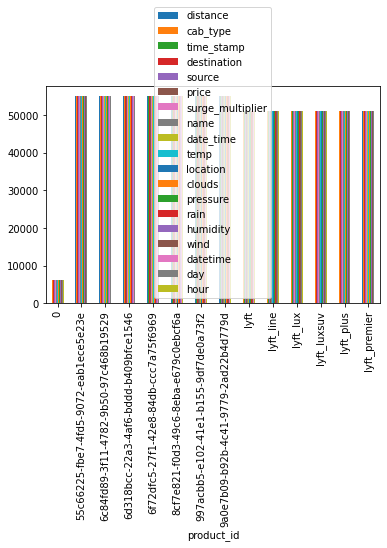

In [41]:
true_data.groupby("product_id").count().plot.bar()

In [42]:
true_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'datetime', 'day', 'hour'],
      dtype='object')

<AxesSubplot:xlabel='cab_type'>

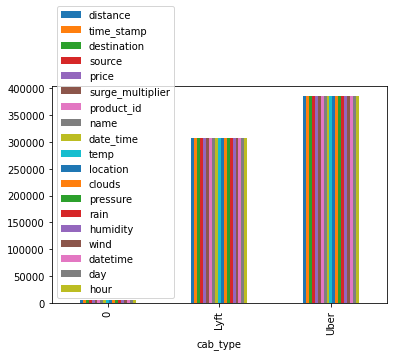

In [43]:
true_data.groupby("cab_type").count().plot.bar()

In [44]:
true_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.00,0,0.00,0.00,0.0,0.00,0.00,0,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.00,0,0.00,0.00,0.0,0.00,0.00,0,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1970-01-01 00:25:43.366822198,0.00,0,0.00,0.00,0.0,0.00,0.00,0,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.00,0,0.00,0.00,0.0,0.00,0.00,0,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.00,0,0.00,0.00,0.0,0.00,0.00,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,44.72,North Station,0.89,1000.69,0.0,0.96,1.52,1970-01-01 00:00:01.543819974,0.0,0.0
6272,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,44.85,Northeastern University,0.88,1000.71,0.0,0.96,1.54,1970-01-01 00:00:01.543819974,0.0,0.0
6273,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,44.82,South Station,0.89,1000.70,0.0,0.96,1.54,1970-01-01 00:00:01.543819974,0.0,0.0
6274,0.00,0,1543819974,0,0,0.0,0.0,0,0,0,44.78,Theatre District,0.89,1000.70,0.0,0.96,1.54,1970-01-01 00:00:01.543819974,0.0,0.0


In [45]:
true_data["price"].value_counts()

0.00     61371
7.00     52314
16.50    44351
10.50    40590
13.50    33707
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: price, Length: 148, dtype: int64

<AxesSubplot:>

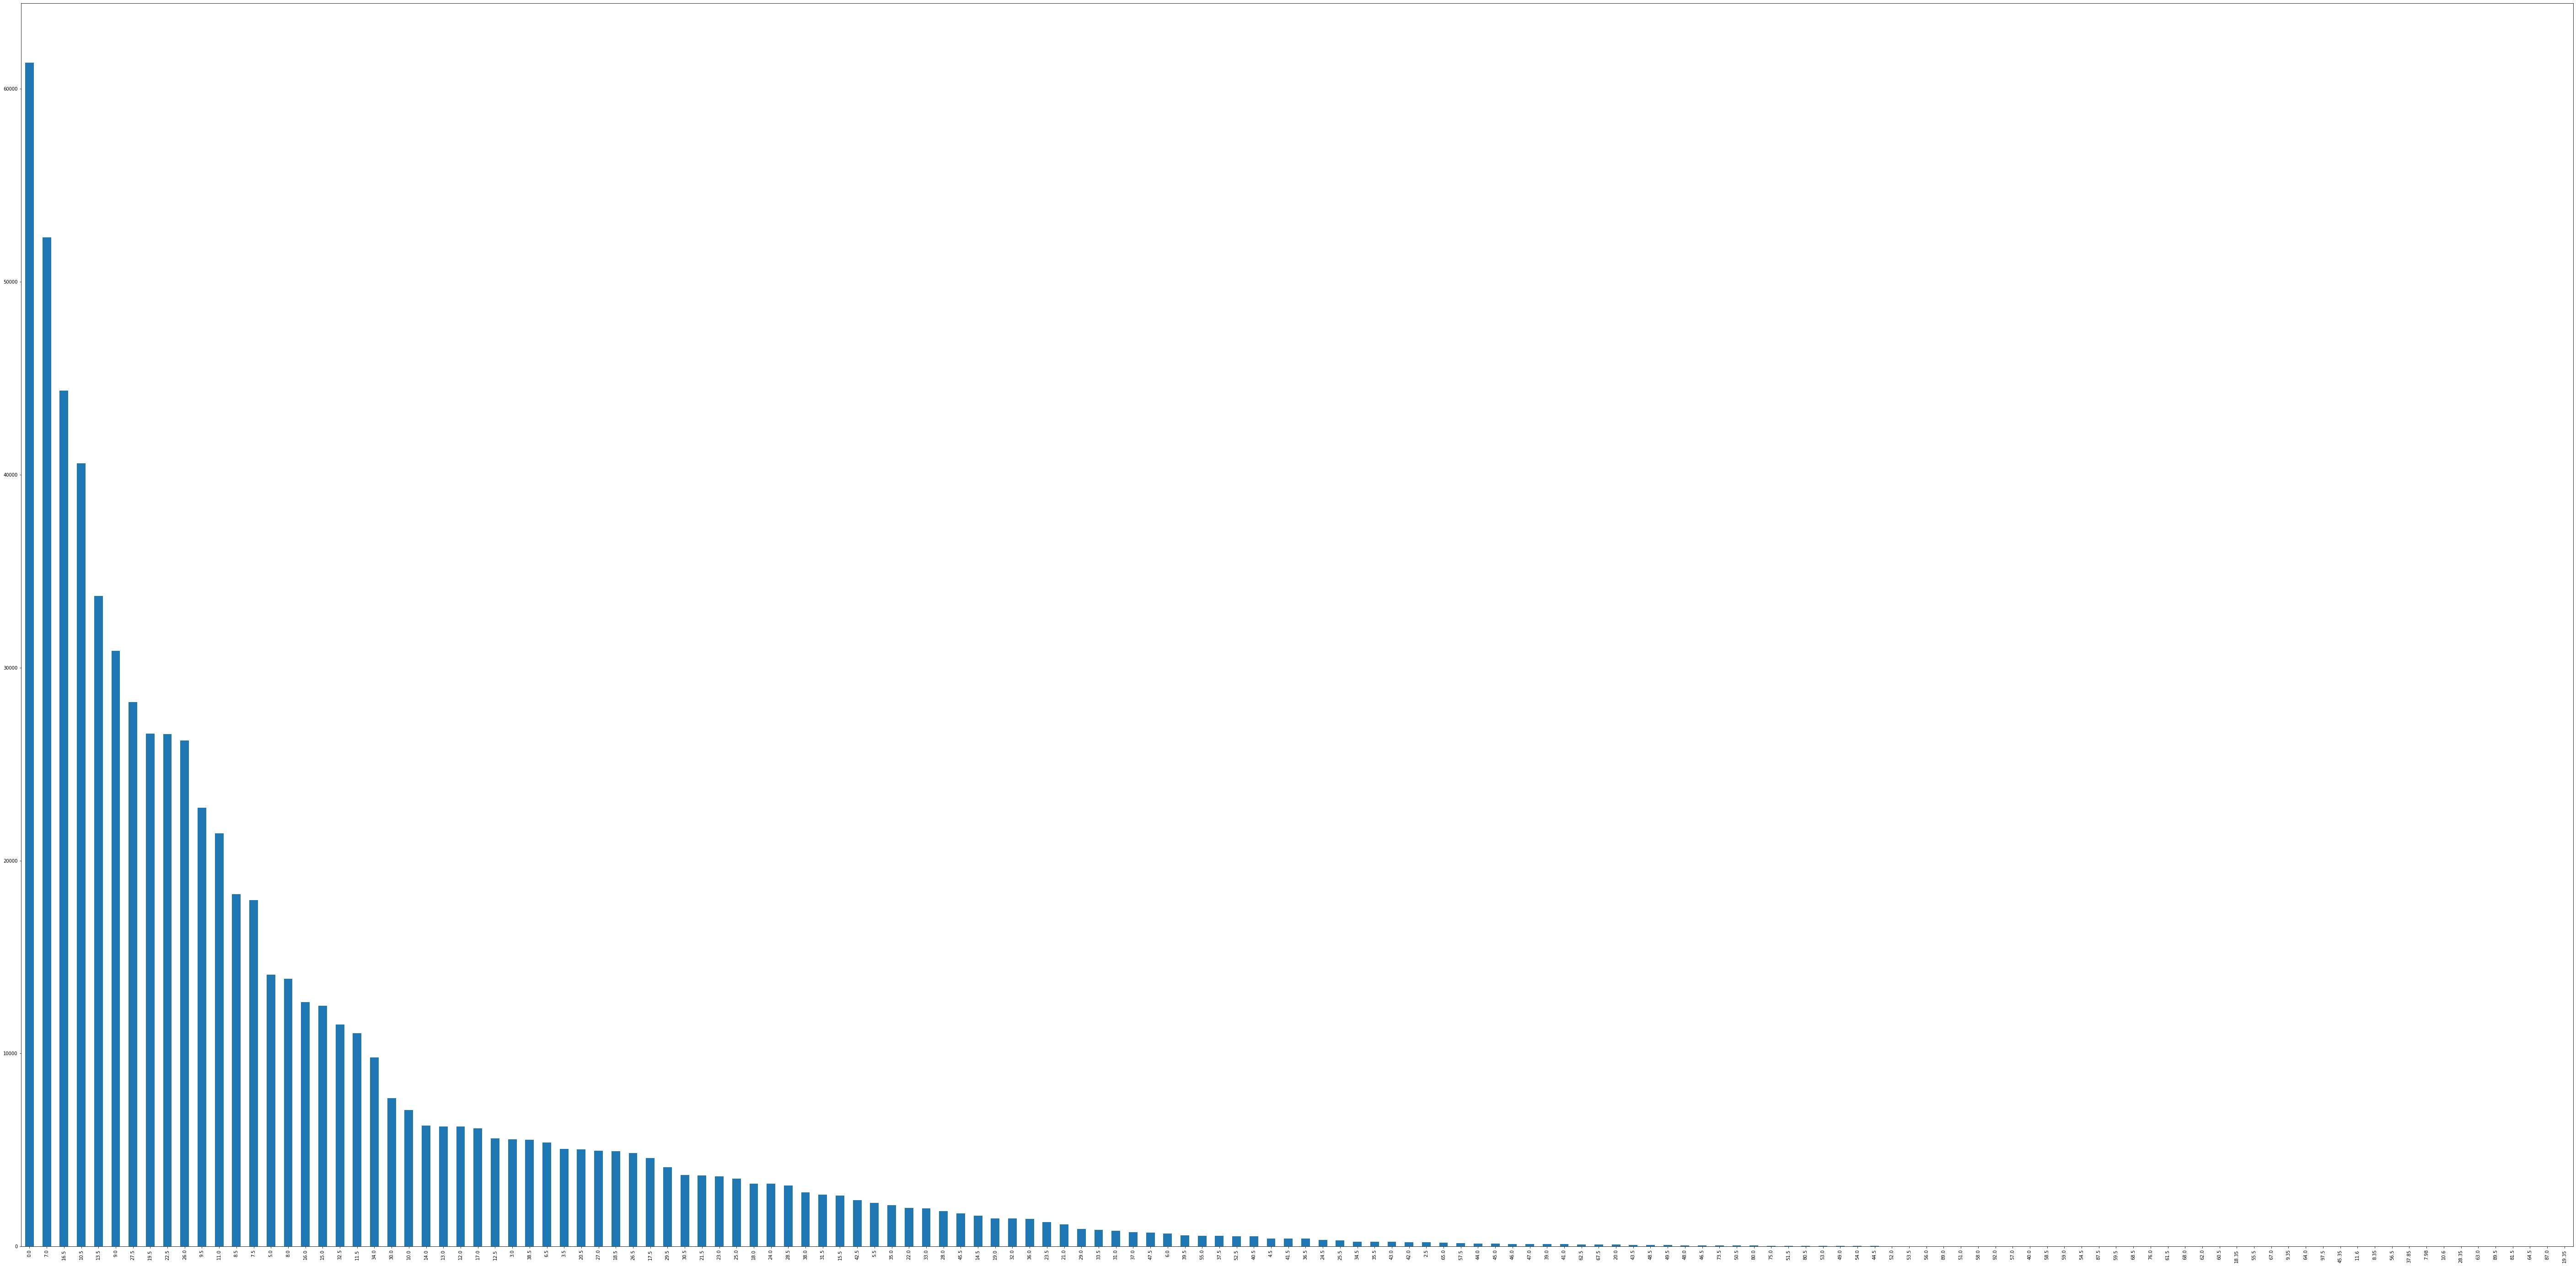

In [46]:
true_data["price"].value_counts().plot(kind='bar', figsize=(100,50))

<AxesSubplot:>

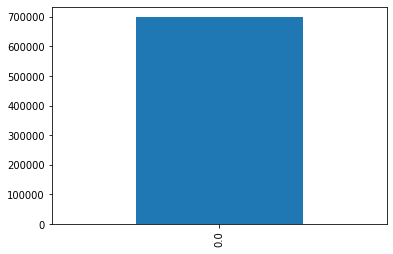

In [47]:
true_data["hour"].value_counts().plot.bar()

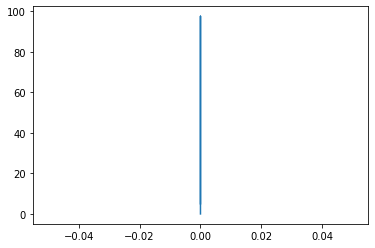

In [48]:
x = true_data['hour']
y = true_data['price']
plt.plot(x,y)
plt.show()

In [49]:
x

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6271    0.0
6272    0.0
6273    0.0
6274    0.0
6275    0.0
Name: hour, Length: 699347, dtype: float64

In [50]:
x.describe()

count    699347.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: hour, dtype: float64

In [51]:
y

0        5.0
1       11.0
2        7.0
3       26.0
4        9.0
        ... 
6271     0.0
6272     0.0
6273     0.0
6274     0.0
6275     0.0
Name: price, Length: 699347, dtype: float64

In [52]:
y.describe()

count    699347.000000
mean         15.093213
std          10.061212
min           0.000000
25%           8.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

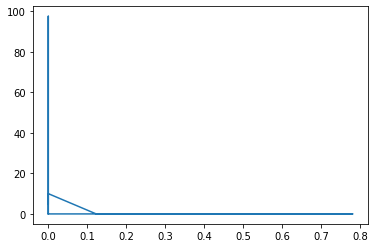

In [57]:
x = true_data['rain']
y = true_data['price']
plt.plot(x, y)
plt.show()

In [58]:
x.describe()

count    699347.000000
mean          0.000074
std           0.004148
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.780700
Name: rain, dtype: float64

In [59]:
true_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'datetime', 'day', 'hour'],
      dtype='object')

In [65]:
x1 = true_data[["distance", "cab_type", "destination", "source", "surge_multiplier", "name", "temp", "location", "humidity", "clouds", "rain", "day", "hour"]]
y1 = true_data[["price"]]

In [66]:
x1

,distance,cab_type,destination,source,surge_multiplier,name,temp,location,humidity,clouds,rain,day,hour
0,0.44,Lyft,North Station,Haymarket Square,1.0,Shared,0.00,0,0.00,0.00,0.0,1.0,0.0
1,0.44,Lyft,North Station,Haymarket Square,1.0,Lux,0.00,0,0.00,0.00,0.0,1.0,0.0
2,0.44,Lyft,North Station,Haymarket Square,1.0,Lyft,0.00,0,0.00,0.00,0.0,1.0,0.0
3,0.44,Lyft,North Station,Haymarket Square,1.0,Lux Black XL,0.00,0,0.00,0.00,0.0,1.0,0.0
4,0.44,Lyft,North Station,Haymarket Square,1.0,Lyft XL,0.00,0,0.00,0.00,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,0.00,0,0,0,0.0,0,44.72,North Station,0.96,0.89,0.0,0.0,0.0
6272,0.00,0,0,0,0.0,0,44.85,Northeastern University,0.96,0.88,0.0,0.0,0.0
6273,0.00,0,0,0,0.0,0,44.82,South Station,0.96,0.89,0.0,0.0,0.0
6274,0.00,0,0,0,0.0,0,44.78,Theatre District,0.96,0.89,0.0,0.0,0.0


In [67]:
y1

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
6271,0.0
6272,0.0
6273,0.0
6274,0.0


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, y_train, x_test, y_test = train_test_split(x1,y1, test_size=0.25, random_state=42)

In [80]:
(x_train.shape)[0] * 100/(true_data.shape)[0]

74.99996425236685

In [81]:
x_train

,distance,cab_type,destination,source,surge_multiplier,name,temp,location,humidity,clouds,rain,day,hour
347989,2.48,Uber,South Station,Beacon Hill,1.0,Black,0.0,0,0.0,0.0,0.0,1.0,0.0
418898,2.32,Uber,Fenway,Beacon Hill,1.0,UberPool,0.0,0,0.0,0.0,0.0,1.0,0.0
652636,0.62,Uber,West End,Haymarket Square,1.0,WAV,0.0,0,0.0,0.0,0.0,1.0,0.0
505391,1.30,Uber,Theatre District,South Station,1.0,UberX,0.0,0,0.0,0.0,0.0,1.0,0.0
443901,0.56,Uber,Haymarket Square,North Station,1.0,Taxi,0.0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4.40,Uber,Financial District,Fenway,1.0,UberX,0.0,0,0.0,0.0,0.0,1.0,0.0
365838,0.91,Lyft,Financial District,Haymarket Square,1.0,Lux Black,0.0,0,0.0,0.0,0.0,1.0,0.0
131932,0.65,Uber,Financial District,South Station,1.0,Black,0.0,0,0.0,0.0,0.0,1.0,0.0
671155,3.08,Uber,Northeastern University,West End,1.0,UberXL,0.0,0,0.0,0.0,0.0,1.0,0.0


In [82]:
y_train

,distance,cab_type,destination,source,surge_multiplier,name,temp,location,humidity,clouds,rain,day,hour
81607,4.27,Lyft,Financial District,Northeastern University,1.5,Lux Black,0.0,0,0.0,0.0,0.0,1.0,0.0
354,2.14,Uber,South Station,West End,1.0,Taxi,0.0,0,0.0,0.0,0.0,1.0,0.0
471801,2.95,Lyft,Theatre District,Boston University,1.0,Lux Black XL,0.0,0,0.0,0.0,0.0,1.0,0.0
407645,0.46,Lyft,South Station,Financial District,1.0,Lux Black XL,0.0,0,0.0,0.0,0.0,1.0,0.0
474760,0.49,Uber,North Station,Haymarket Square,1.0,Black SUV,0.0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538489,0.55,Uber,South Station,Theatre District,1.0,WAV,0.0,0,0.0,0.0,0.0,1.0,0.0
579511,2.44,Lyft,Beacon Hill,Northeastern University,1.0,Lyft XL,0.0,0,0.0,0.0,0.0,1.0,0.0
5421,0.99,Uber,Financial District,Haymarket Square,1.0,UberPool,0.0,0,0.0,0.0,0.0,1.0,0.0
279982,1.00,Uber,North End,West End,1.0,WAV,0.0,0,0.0,0.0,0.0,1.0,0.0


In [83]:
x_test

,price
347989,20.5
418898,9.0
652636,7.5
505391,7.5
443901,0.0
...,...
259178,11.5
365838,16.5
131932,16.0
671155,18.5


In [84]:
y_test

,price
81607,42.5
354,0.0
471801,32.5
407645,27.5
474760,27.5
...,...
538489,7.5
579511,13.5
5421,9.0
279982,8.0


In [85]:
(y_test.shape)[0] * 100 / (true_data.shape)[0]

25.00003574763315

In [86]:
lmodel = LinearRegression()
lmodel.fit(x_train, x_test)

ValueError: could not convert string to float: 'Uber'

In [87]:
x_train.columns

Index(['distance', 'cab_type', 'destination', 'source', 'surge_multiplier',
       'name', 'temp', 'location', 'humidity', 'clouds', 'rain', 'day',
       'hour'],
      dtype='object')

In [90]:
x_train = x_train.drop(columns=["cab_type", 'name', 'destination', 'source'])

In [91]:
x_train.columns

Index(['distance', 'surge_multiplier', 'temp', 'location', 'humidity',
       'clouds', 'rain', 'day', 'hour'],
      dtype='object')

In [92]:
x_train.head()

,distance,surge_multiplier,temp,location,humidity,clouds,rain,day,hour
347989,2.48,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
418898,2.32,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
652636,0.62,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
505391,1.30,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
443901,0.56,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0


In [93]:
x_test.head()

,price
347989,20.5
418898,9.0
652636,7.5
505391,7.5
443901,0.0


In [94]:
y_train.head()

,distance,cab_type,destination,source,surge_multiplier,name,temp,location,humidity,clouds,rain,day,hour
81607,4.27,Lyft,Financial District,Northeastern University,1.5,Lux Black,0.0,0,0.0,0.0,0.0,1.0,0.0
354,2.14,Uber,South Station,West End,1.0,Taxi,0.0,0,0.0,0.0,0.0,1.0,0.0
471801,2.95,Lyft,Theatre District,Boston University,1.0,Lux Black XL,0.0,0,0.0,0.0,0.0,1.0,0.0
407645,0.46,Lyft,South Station,Financial District,1.0,Lux Black XL,0.0,0,0.0,0.0,0.0,1.0,0.0
474760,0.49,Uber,North Station,Haymarket Square,1.0,Black SUV,0.0,0,0.0,0.0,0.0,1.0,0.0


In [95]:
y_train = y_train.drop(columns=['cab_type', 'destination', 'source', 'name'])

In [96]:
lmodel = LinearRegression()
lmodel.fit(x_train, x_test)

ValueError: could not convert string to float: 'West End'

In [97]:
x_train.head(10)

,distance,surge_multiplier,temp,location,humidity,clouds,rain,day,hour
347989,2.48,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
418898,2.32,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
652636,0.62,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
505391,1.30,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
443901,0.56,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
156128,1.01,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
173211,1.65,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
79117,3.16,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
66762,3.05,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
447083,2.43,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0


In [98]:
x_train.describe()

,distance,surge_multiplier,temp,humidity,clouds,rain,day,hour
count,524510.000000,524510.000000,524510.000000,524510.000000,524510.000000,524510.000000,524510.000000,524510.0
mean,2.170815,1.004887,0.348911,0.006833,0.006078,0.000076,0.991060,0.0
std,1.152086,0.132301,3.717473,0.072938,0.070533,0.004264,0.094127,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,2.140000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,2.910000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,7.860000,3.000000,55.370000,0.990000,1.000000,0.780700,1.000000,0.0


In [100]:
x_train = x_train.drop('location', axis=1)

In [101]:
x_train.head()

,distance,surge_multiplier,temp,humidity,clouds,rain,day,hour
347989,2.48,1.0,0.0,0.0,0.0,0.0,1.0,0.0
418898,2.32,1.0,0.0,0.0,0.0,0.0,1.0,0.0
652636,0.62,1.0,0.0,0.0,0.0,0.0,1.0,0.0
505391,1.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0
443901,0.56,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
y_train = y_train.drop('location', axis=1)

In [103]:
lmodel = LinearRegression()
lmodel.fit(x_train, x_test)

LinearRegression()

In [104]:
prediction = lmodel.predict(y_train)

In [105]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':prediction})

ValueError: Per-column arrays must each be 1-dimensional

In [106]:
prediction

array([[32.54791635],
       [14.75560763],
       [16.81696874],
       ...,
       [11.82898384],
       [11.85443274],
       [13.22867348]])

In [107]:
prediction[0]

array([32.54791635])

In [108]:
predictions = prediction.tolist()

In [109]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

ValueError: Data must be 1-dimensional

In [114]:
len(prediction)
predictions = []

In [117]:
for i, value in enumerate(prediction):
    print(value[0])
    break


32.547916350824615


In [118]:
for i, value in enumerate(prediction):
    predictions.append(value[0])

In [119]:
predictions

[32.547916350824615,
 14.755607633674641,
 16.81696874322845,
 10.480191999044527,
 10.556538706805776,
 15.468176906112992,
 13.712202627604194,
 12.745144329295004,
 11.34545468700538,
 39.3462991503543,
 17.046008866512203,
 12.439757498249994,
 13.279571283623765,
 20.68520193646522,
 17.147804476860536,
 17.300497892383042,
 13.126877868101262,
 15.569972516461329,
 12.71969542670792,
 11.65084151805039,
 11.930779446508316,
 14.83195434143589,
 16.96966215875095,
 12.439757498249994,
 16.96966215875095,
 17.22415118462179,
 11.854432738747063,
 17.147804476860536,
 17.046008866512203,
 18.089413872582647,
 16.23164398372551,
 18.29300509327932,
 14.322976289694212,
 12.236166277553322,
 11.65084151805039,
 16.740622035467197,
 15.620870321635499,
 23.45913231845737,
 10.811027732676616,
 14.959198854371314,
 15.569972516461329,
 13.10142896551418,
 14.83195434143589,
 12.745144329295004,
 13.483162504320438,
 15.035545562132564,
 15.213687880242153,
 20.58340632611688,
 20.710650

In [123]:
df = pd.DataFrame({'Actual':y_test, 'predicted':predictions})
df

ValueError: Data must be 1-dimensional

In [122]:
predictions = np.array(predictions)

In [124]:
predictions

array([32.54791635, 14.75560763, 16.81696874, ..., 11.82898384,
       11.85443274, 13.22867348])

In [125]:
y1 = true_data['price']

In [126]:
y1

0        5.0
1       11.0
2        7.0
3       26.0
4        9.0
        ... 
6271     0.0
6272     0.0
6273     0.0
6274     0.0
6275     0.0
Name: price, Length: 699347, dtype: float64

In [128]:
x1.columns

Index(['distance', 'cab_type', 'destination', 'source', 'surge_multiplier',
       'name', 'temp', 'location', 'humidity', 'clouds', 'rain', 'day',
       'hour'],
      dtype='object')

In [131]:
x1 = x1.drop(columns=['cab_type', 'destination', 'source', 'name', 'location'])

In [132]:
x1

,distance,surge_multiplier,temp,humidity,clouds,rain,day,hour
0,0.44,1.0,0.00,0.00,0.00,0.0,1.0,0.0
1,0.44,1.0,0.00,0.00,0.00,0.0,1.0,0.0
2,0.44,1.0,0.00,0.00,0.00,0.0,1.0,0.0
3,0.44,1.0,0.00,0.00,0.00,0.0,1.0,0.0
4,0.44,1.0,0.00,0.00,0.00,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
6271,0.00,0.0,44.72,0.96,0.89,0.0,0.0,0.0
6272,0.00,0.0,44.85,0.96,0.88,0.0,0.0,0.0
6273,0.00,0.0,44.82,0.96,0.89,0.0,0.0,0.0
6274,0.00,0.0,44.78,0.96,0.89,0.0,0.0,0.0


In [133]:
x_train, y_train, x_test, y_test = train_test_split(x1,y1, test_size=0.25, random_state=42)

In [134]:
x_test

347989    20.5
418898     9.0
652636     7.5
505391     7.5
443901     0.0
          ... 
259178    11.5
365838    16.5
131932    16.0
671155    18.5
121958    13.5
Name: price, Length: 524510, dtype: float64

In [135]:
lmodel = LinearRegression()
lmodel.fit(x_train, x_test)

LinearRegression()

In [136]:
predictions = lmodel.predict(y_train)

In [137]:
df = pd.DataFrame({'Actual':y_test, 'predicted':predictions})

In [138]:
df

,Actual,predicted
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


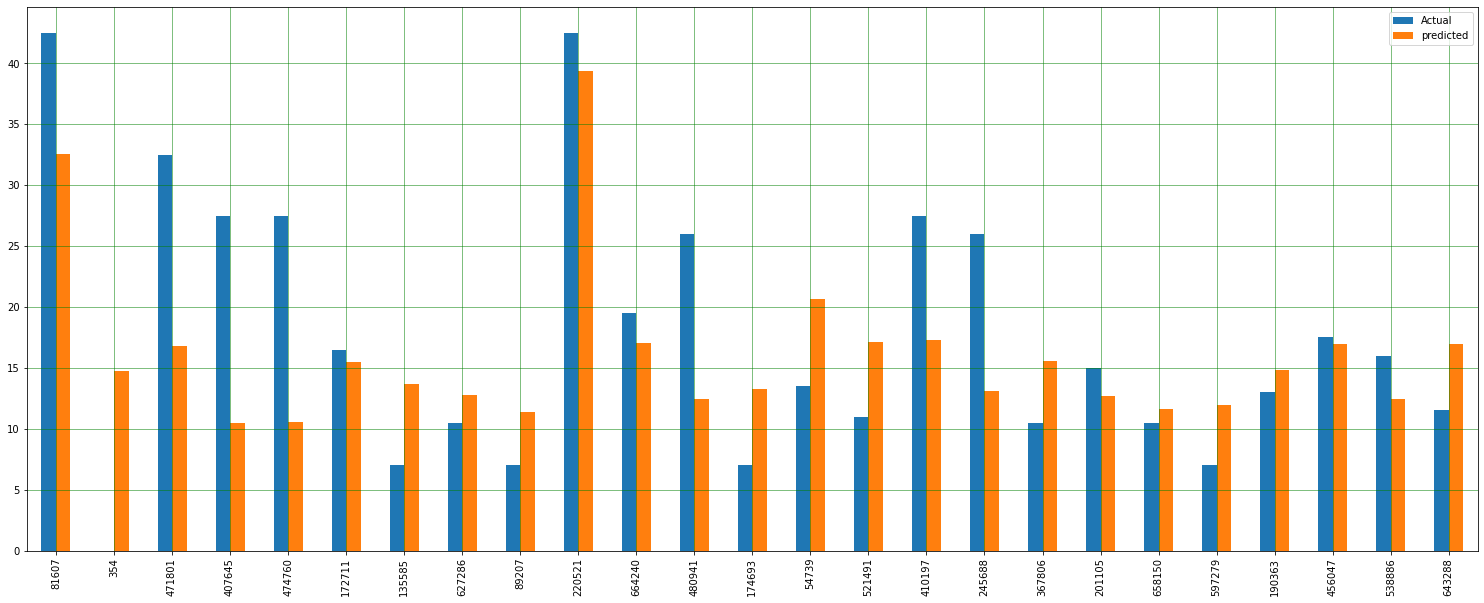

In [142]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth=0.5, color='green')
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='red')
plt.show()